 Make  classification data and get it ready

In [2]:
import sklearn
from sklearn.datasets import make_circles

#make 1000 samples
n_samples=1000

#create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [5]:
print(f"first 5 samples of X: \n {X[:5]}")
print(f"\n first 5 smples of y:\n {y[:5]}")

first 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

 first 5 smples of y:
 [1 1 1 1 0]


In [6]:
#Make dataframe of circle data

In [7]:
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


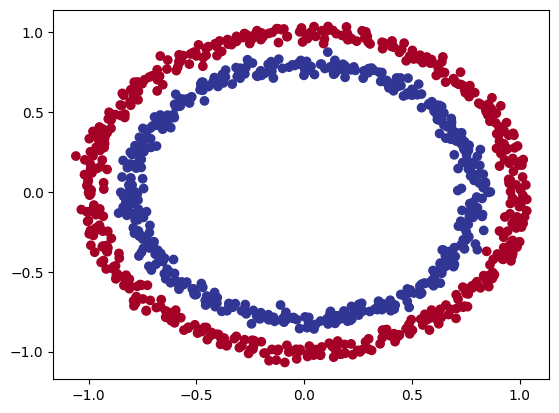

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap=plt.cm.RdYlBu);

In [9]:
#check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
#view the 1st ex of features and labels
X_sample =X[0]
y_sample=y[0]

print(X_sample, y_sample)
print(X.shape, y.shape)

[0.75424625 0.23148074] 1
(1000, 2) (1000,)


In [11]:
import torch
torch.__version__

'2.1.0+cu121'

In [12]:
#Turn data into tensors and create train and test splits

In [13]:
X=torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

In [14]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
#Split data into training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Building the model
1. set up device agonistic code so our code will run on an accelator if there is one
2. construct the model by subclassing nn.Module
3. define loss function and optimizer
4. create training and test loop

In [18]:
import torch
from torch import nn

#make device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [19]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

##Lets create a Model
1.Subclass 'nn.module' (almost all models in PyTorch subclass 'nn.Module')

2.Create 2 'nn.Linear()' layers that are capableof handling the shapes of our data

3.Define a 'forward()' method that outlines the forward pass(or forward computation) of the model

4.instatiate an instance of our model class and send it to the target device

In [21]:
#1. construct a model that subclass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. create 2 nn.linear layers capable of handling the shapes of data
    self.layer_1=nn.Linear(in_features= 2, out_features=5)
    self.layer_2 =nn.Linear(in_features=5, out_features=1)

  #3.def forward
  def forward(self,x):
    return self.layer_2(self.layer_1(x))


In [ ]:
#4. Instantiate an instance of our model
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.parameters()

<generator object Module.parameters at 0x7f0210cf3660>

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
#lets replicate the above model using nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
    ).to(device)

In [ ]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.2307, -0.5969],
                      [ 0.3311,  0.0520],
                      [ 0.4641,  0.0424],
                      [ 0.2788,  0.3458],
                      [-0.0405,  0.1583]])),
             ('0.bias', tensor([ 0.2011, -0.3818, -0.4577,  0.4274, -0.2940])),
             ('1.weight',
              tensor([[-0.3396, -0.3918, -0.0157,  0.1888, -0.2100]])),
             ('1.bias', tensor([-0.1331]))])

In [ ]:
# Make predictions
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape:{untrained_preds.shape}")
print(f"length of test samples: {len(X_test)}, shape:{X_test.shape}")
print(f"\nFirst 10 predictons : \n {untrained_preds[:10]} ")
print(f"\n First 10 labels: {y_test[:10]}")


Length of predictions: 200, shape:torch.Size([200, 1])
length of test samples: 200, shape:torch.Size([200, 2])

First 10 predictons : 
 tensor([[ 0.2428],
        [ 0.3031],
        [ 0.0289],
        [ 0.3037],
        [-0.0601],
        [-0.0226],
        [ 0.2175],
        [ 0.1410],
        [ 0.0330],
        [ 0.3061]], grad_fn=<SliceBackward0>) 

 First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

#Set up loss funcion and optimizer
which loss function or optimizer should one use?

for regression --- MAE / MSE

for classification --- Binary cross entropy / Cross entropy

2 most used optimizers are:
1. SGD    2. Adam


for loss fucnn : torch.nn.BECWithLogitLoss()


In [ ]:
#setup loss function
loss_fn= nn.BCEWithLogitsLoss()   #it has sigmoid activation function builtin

optimizer= torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.2307, -0.5969],
                      [ 0.3311,  0.0520],
                      [ 0.4641,  0.0424],
                      [ 0.2788,  0.3458],
                      [-0.0405,  0.1583]])),
             ('0.bias', tensor([ 0.2011, -0.3818, -0.4577,  0.4274, -0.2940])),
             ('1.weight',
              tensor([[-0.3396, -0.3918, -0.0157,  0.1888, -0.2100]])),
             ('1.bias', tensor([-0.1331]))])

In [ ]:
#Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc

#training the model
1. forward pass
2. calculate the loss
3. optimizer zero grad
4.loss backward
5.optimizer (grad descent)

## going from raw logits--> predictin proabilities -->prediction labels
convert from logit to prediction probabilities by using activation function. for binary classification we use sigmoid and for multiclass classification we use softmax

then we can convert prediction probabilities to prediction labels by using argmax() or by rounding them

In [ ]:
with torch.inference_mode():
 y_logits= model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.2428],
        [ 0.3031],
        [ 0.0289],
        [ 0.3037],
        [-0.0601]])

In [ ]:
#use the sigmoid activation fucntion on our logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5604],
        [0.5752],
        [0.5072],
        [0.5753],
        [0.4850]])

In [ ]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]])

In [ ]:
#find the predicted labels
y_preds=torch.round(y_pred_probs)

#in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

#check equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 0.])

In [ ]:
### Building a training a testing loops
torch.manual_seed(42)
torch.cuda.manual_seed(42)


#set the number of epochs
epochs=100

#put data to target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)


#build training and evaluation loop
for epoch in range(epochs):
  model_0.train()

  #1. forward pass
  y_logits= model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits-->pred probs-->target labels

  #2. calculte loss/ accuracy

  #loss = loss_fn(torch.sigmoid(y_logits,y_train)): if nn.BCELoss

  loss = loss_fn(y_logits, y_train) #nn.BCEWithLogitsLoss expects raw logits as input

  acc= accuracy_fn(y_true=y_train,
                   y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizer step
  optimizer.step()

  #testing
  #1.forward pass
  model_0.eval()
  with torch.inference_mode():
   test_logits = model_0(X_test).squeeze()
   test_pred = torch.round(torch.sigmoid(test_logits))

   #2. calculate the test loss/acc
   test_loss = loss_fn(test_logits,y_test)

   test_acc = accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

   #print out whats happening
   if epoch%10==0:
     print(f"Epoch: {epoch} | Loss:{loss:.5f} | acc:{acc:.2f}% | Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}%  ")







Epoch: 0 | Loss:0.69544 | acc:52.88% | Test loss:0.70138 | Test acc:50.50%  
Epoch: 10 | Loss:0.69455 | acc:52.00% | Test loss:0.70013 | Test acc:47.50%  
Epoch: 20 | Loss:0.69414 | acc:52.00% | Test loss:0.69938 | Test acc:49.00%  
Epoch: 30 | Loss:0.69391 | acc:51.88% | Test loss:0.69884 | Test acc:47.50%  
Epoch: 40 | Loss:0.69376 | acc:51.50% | Test loss:0.69841 | Test acc:47.50%  
Epoch: 50 | Loss:0.69365 | acc:50.88% | Test loss:0.69804 | Test acc:46.50%  
Epoch: 60 | Loss:0.69356 | acc:50.88% | Test loss:0.69773 | Test acc:46.50%  
Epoch: 70 | Loss:0.69348 | acc:50.62% | Test loss:0.69745 | Test acc:46.00%  
Epoch: 80 | Loss:0.69342 | acc:50.75% | Test loss:0.69720 | Test acc:46.00%  
Epoch: 90 | Loss:0.69336 | acc:50.88% | Test loss:0.69698 | Test acc:46.00%  


In [ ]:
#now lets change the model
class CircleModelV1(nn.Module):
 def __init__(self):
   super().__init__()
   self.layer_1 =nn.Linear(in_features=2, out_features=10)
   self.layer_2 =nn.Linear(in_features=10, out_features=10)
   self.layer_3=nn.Linear(in_features=10, out_features=1)

 def forward(self, x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1= CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#create a loss function
loss_fn =nn.BCEWithLogitsLoss()
#create optimizer
optimizer= torch.optim.SGD(params=model_1.parameters(),lr=0.1)


In [ ]:
#training and evaluation loop for model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


epochs = 1000

#put data data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #training
  model_1.train()

  #1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2.calculate the loss/acc
  loss = loss_fn(y_pred, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3.Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. optimizer step(gradient descent)
  optimizer.step()

  ##Testing
  model_1.eval()

  with torch.inference_mode():
    #1. forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculte the loss
    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

    #print out whats hapening
  if epoch%100 ==0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} | acc:{acc:.2f}% | Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}%  ")





Epoch: 0 | Loss:0.75769 | acc:50.88% | Test loss:0.69261 | Test acc:51.00%  
Epoch: 100 | Loss:0.75769 | acc:50.88% | Test loss:0.69261 | Test acc:51.00%  
Epoch: 200 | Loss:0.75769 | acc:50.88% | Test loss:0.69261 | Test acc:51.00%  
Epoch: 300 | Loss:0.75769 | acc:50.88% | Test loss:0.69261 | Test acc:51.00%  
Epoch: 400 | Loss:0.75769 | acc:50.88% | Test loss:0.69261 | Test acc:51.00%  
Epoch: 500 | Loss:0.75769 | acc:50.88% | Test loss:0.69261 | Test acc:51.00%  
Epoch: 600 | Loss:0.75769 | acc:50.88% | Test loss:0.69261 | Test acc:51.00%  
Epoch: 700 | Loss:0.75769 | acc:50.88% | Test loss:0.69261 | Test acc:51.00%  
Epoch: 800 | Loss:0.75769 | acc:50.88% | Test loss:0.69261 | Test acc:51.00%  
Epoch: 900 | Loss:0.75769 | acc:50.88% | Test loss:0.69261 | Test acc:51.00%  


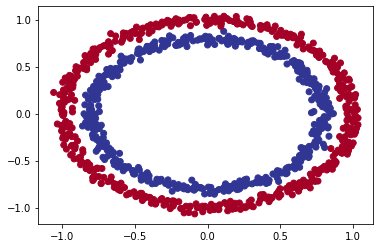

In [ ]:
#make and plot data
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles

#make 1000 samples
n_samples=1000

#create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
import torch

from sklearn.model_selection import train_test_split
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

#Split data into training and testing split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train[:5],y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

In [ ]:
# Build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10, out_features=10)
    self.layer_3=nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    #where should we put non linear activation fn
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3



CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#setup loss and optimizer
loss_fn =nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(model_3.parameters(),lr=0.1)

In [ ]:
#training and evaluation loop for model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


epochs = 1000

#put data data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #training
  model_3.train()

  #1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2.calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3.Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. optimizer step(gradient descent)
  optimizer.step()

  ##Testing
  model_3.eval()

  with torch.inference_mode():
    #1. forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculte the loss
    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

    #print out whats hapening
  if epoch%100 ==0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} | acc:{acc:.2f}% | Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}%  ")





Epoch: 0 | Loss:0.69295 | acc:50.00% | Test loss:0.69319 | Test acc:50.00%  
Epoch: 100 | Loss:0.69115 | acc:52.88% | Test loss:0.69102 | Test acc:52.50%  
Epoch: 200 | Loss:0.68977 | acc:53.37% | Test loss:0.68940 | Test acc:55.00%  
Epoch: 300 | Loss:0.68795 | acc:53.00% | Test loss:0.68723 | Test acc:56.00%  
Epoch: 400 | Loss:0.68517 | acc:52.75% | Test loss:0.68411 | Test acc:56.50%  
Epoch: 500 | Loss:0.68102 | acc:52.75% | Test loss:0.67941 | Test acc:56.50%  
Epoch: 600 | Loss:0.67515 | acc:54.50% | Test loss:0.67285 | Test acc:56.00%  
Epoch: 700 | Loss:0.66659 | acc:58.38% | Test loss:0.66322 | Test acc:59.00%  
Epoch: 800 | Loss:0.65160 | acc:64.00% | Test loss:0.64757 | Test acc:67.50%  
Epoch: 900 | Loss:0.62362 | acc:74.00% | Test loss:0.62145 | Test acc:79.00%  


In [ ]:
#model evaluation:
model_3.eval()
with torch.inference_mode():
  y_preds= torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]




(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

#Multiclass classification


In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set hyperparameter for data creation
NUM_CLASSES = 4
NUM_FEATURES=2
RANDOM_SEED= 42

#1. create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features = NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state= RANDOM_SEED)

#2. turn data into tensors
X_blob= torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


#Split data into training and testing split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2, random_state=42)

X_blob_train[:5],y_blob_train[:5]




(tensor([[ 5.0405,  3.3076],
         [-2.6249,  9.5260],
         [-8.5240, -9.0402],
         [-6.0262, -4.4375],
         [-3.3397,  7.2175]]), tensor([1, 0, 2, 2, 0]))

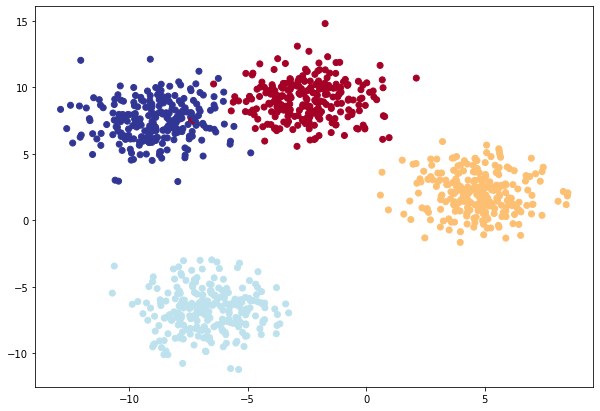

In [ ]:
#plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
#building a multiclass classification model
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#building a multiclass classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features= input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

  #create an instance of model and send it to the target device
model_4= BlobModel(input_features=2,
                   output_features=4,
                   hidden_units=8).to(device)



In [ ]:
#create a loss function and an optimizer for multi-class classification model
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)


In [ ]:
#getting prediction probabilities for a multiclass model(logits/raw outputs)
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test)
y_logits[:5]




tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])

In [ ]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0])

In [ ]:
y_pred_probs= torch.softmax(y_logits, dim=1)
print(y_logits[:5])
y_pred_probs[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])


tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])

In [ ]:
torch.max(y_pred_probs[0])

tensor(0.3244)

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [ ]:
#convert models prediction probabilities to models prediction labels
y_preds= torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

#creating training and testing loops for a multiclass model


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs=100

#data to target device
X_blob_train, y_blob_train =X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test =X_blob_test.to(device), y_blob_test.to(device)

#loop through data
for epoch in range(epochs):
  #training
  model_4.train()

  #1. forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  #2.calculate the loss/acc
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  #3.Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. optimizer step(gradient descent)
  optimizer.step()

  ##Testing
  model_4.eval()

  with torch.inference_mode():
    #1. forward pass
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    #2. calculte the loss
    test_loss= loss_fn(test_logits, y_blob_test)
    test_acc= accuracy_fn(y_true=y_blob_test,
                          y_pred=test_pred)

    #print out whats hapening
  if epoch%10 ==0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} | acc:{acc:.2f}% | Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}%  ")


Epoch: 0 | Loss:1.15883 | acc:40.38% | Test loss:1.07554 | Test acc:48.00%  
Epoch: 10 | Loss:0.64476 | acc:96.75% | Test loss:0.66069 | Test acc:97.50%  
Epoch: 20 | Loss:0.42535 | acc:98.50% | Test loss:0.43074 | Test acc:100.00%  
Epoch: 30 | Loss:0.25294 | acc:99.12% | Test loss:0.24508 | Test acc:99.50%  
Epoch: 40 | Loss:0.11232 | acc:99.25% | Test loss:0.10229 | Test acc:99.50%  
Epoch: 50 | Loss:0.06627 | acc:99.25% | Test loss:0.05848 | Test acc:99.50%  
Epoch: 60 | Loss:0.05068 | acc:99.25% | Test loss:0.04293 | Test acc:99.50%  
Epoch: 70 | Loss:0.04300 | acc:99.25% | Test loss:0.03491 | Test acc:99.50%  
Epoch: 80 | Loss:0.03836 | acc:99.25% | Test loss:0.02988 | Test acc:99.50%  
Epoch: 90 | Loss:0.03525 | acc:99.25% | Test loss:0.02663 | Test acc:99.50%  


In [ ]:
model_4.eval()
with torch.inference_mode():
   y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [ ]:
y_pred_probs= torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_pred= torch.argmax(y_pred_probs, dim=1)
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
!pip install torchmetrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 10.2 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

In [ ]:
# setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4)

#calculate accuracy
torchmetric_accuracy(y_pred, y_blob_test)


tensor(0.9950)